In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize']=(16,14)

## Load the data

In [2]:
data=pd.read_csv("datasets/fifa_players.csv")

## Exploring the data

In [3]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

1. What is the distribution of players' overall ratings and how does it vary by nationality?

In [4]:
data.groupby('nationality')['overall_rating'].max().sort_values(ascending=False)

nationality
Argentina           94
Portugal            94
Brazil              92
Belgium             91
Uruguay             91
                    ..
Malta               61
Papua New Guinea    61
South Sudan         60
Yemen               58
Indonesia           56
Name: overall_rating, Length: 160, dtype: int64

In [5]:
data.sort_values('overall_rating',ascending=False)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
17944,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,94,...,93,63,29,95,82,85,95,28,31,23
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,82,56,36,89,88,81,94,27,24,33
17941,K. De Bruyne,Kevin De Bruyne,6/28/1991,27,154.94,69.9,"CAM,CM",Belgium,91,92,...,91,76,61,87,94,79,90,68,58,51
17940,E. Hazard,Eden Hazard,1/7/1991,28,172.72,76.2,"LW,CF",Belgium,91,91,...,80,54,41,87,89,86,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,Zhang Yufeng,张宇峰,1/5/1998,21,152.40,78.9,CM,China PR,47,59,...,34,55,43,29,50,43,39,53,41,51
4862,Gao Yuqin,Yuqin Gao,3/27/2000,18,185.42,82.1,GK,China PR,47,66,...,5,26,11,4,30,18,34,12,13,11
4860,C. Ehlich,Christoph Ehlich,2/2/1999,20,170.18,68.0,RB,Germany,47,59,...,41,38,36,44,38,47,47,40,42,42
4859,L. Collins,Lewis Collins,5/9/2001,17,152.40,67.1,CM,Wales,47,62,...,36,36,36,44,47,36,46,33,38,41


2. How does players' age correlate with their overall rating and potential?

<Axes: >

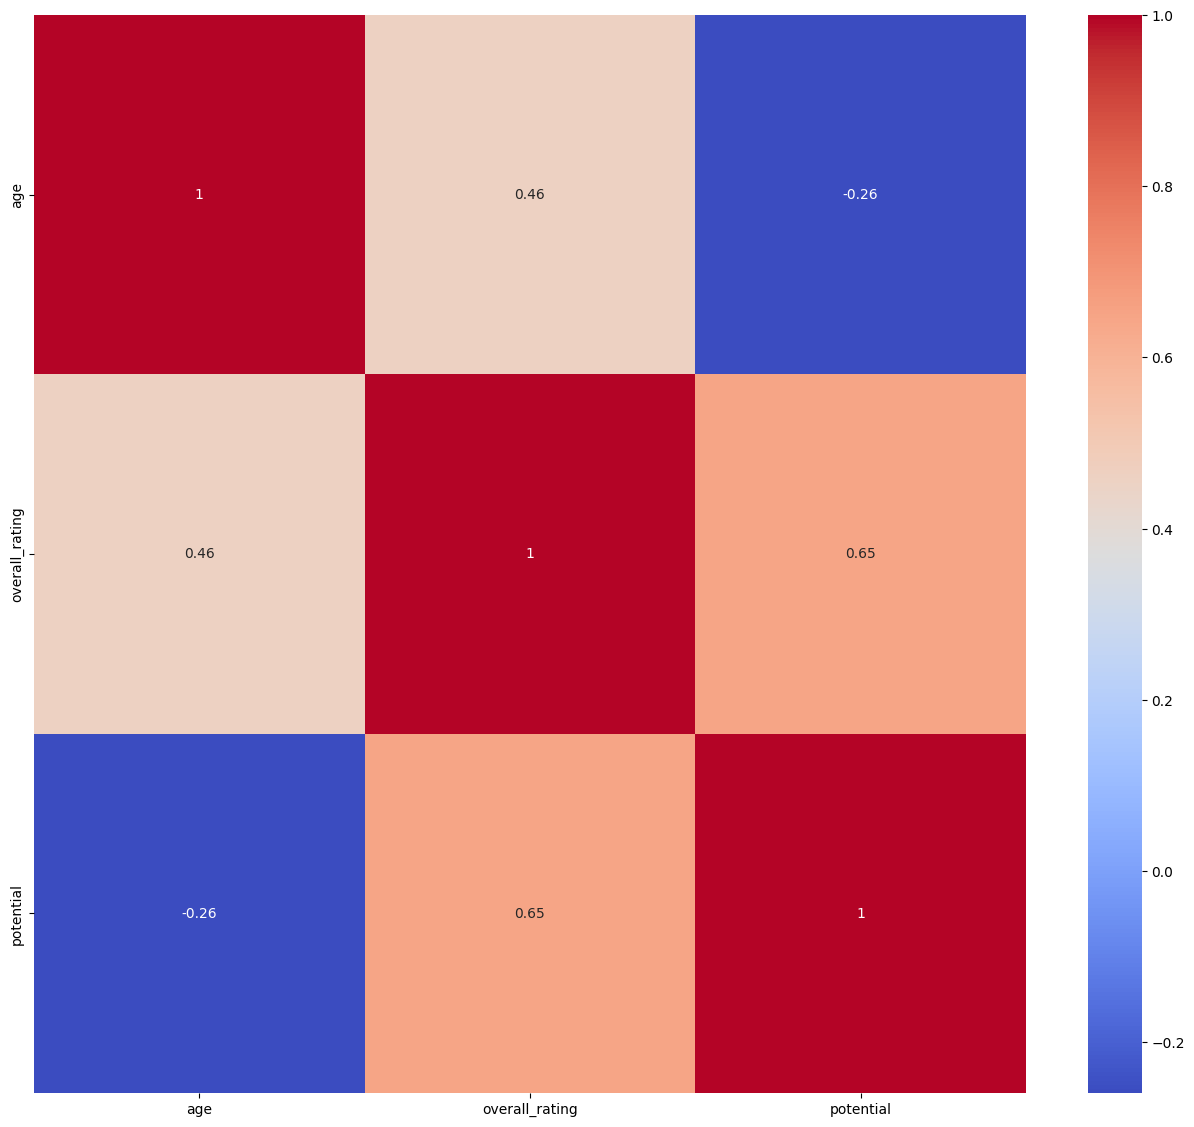

In [6]:
age_corr=data[['age','overall_rating','potential']].corr()
sns.heatmap(age_corr,cmap="coolwarm",annot=True)

3. Which countries have the highest average player value and wage?

<Axes: xlabel='nationality'>

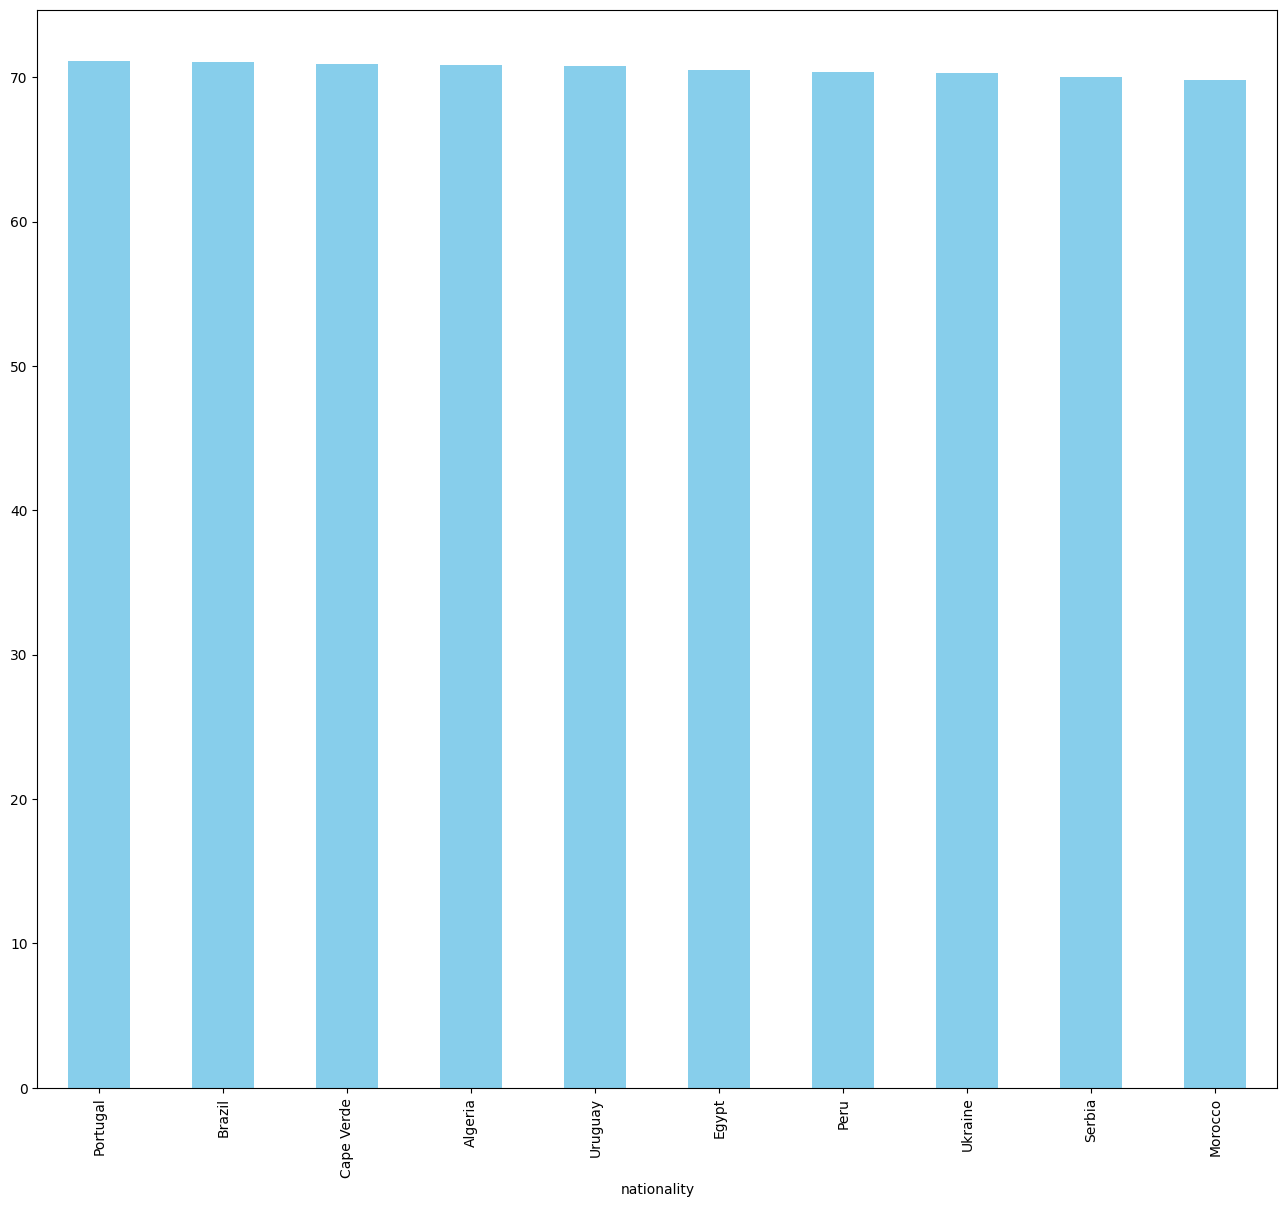

In [7]:
nationality_counts = data['nationality'].value_counts()
eligible_nationalities = nationality_counts[nationality_counts >= 20].index

filtered_data = data[data['nationality'].isin(eligible_nationalities)]


top_10_countries=filtered_data.groupby('nationality')['overall_rating'].mean().sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar',color='skyblue')

In [8]:
data[data['nationality']=='Portugal'].sort_values('overall_rating',ascending=False).head(20)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
17944,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,94,...,93,63,29,95,82,85,95,28,31,23
17914,Bernardo Silva,Bernardo Mota Veiga de Carvalho e Silva,8/10/1994,24,172.72,64.0,"CAM,CM,RW,RM",Portugal,86,91,...,72,62,49,83,86,68,86,49,52,40
17891,A. Lopes,Anthony Lopes,10/1/1990,28,182.88,81.2,GK,Portugal,85,87,...,18,43,25,9,48,16,65,13,15,13
17871,Pepe,Képler Laveran Lima Ferreira,2/26/1983,36,187.96,81.2,CB,Portugal,85,85,...,56,92,85,40,48,57,79,86,85,82
38,Bruno Fernandes,Bruno Miguel Borges Fernandes,9/8/1994,24,152.40,68.9,"CAM,CM",Portugal,84,88,...,88,66,71,81,86,82,84,66,66,57
17841,Quaresma,Ricardo Andrade Quaresma Bernardo,9/26/1983,35,175.26,67.1,"RM,LM",Portugal,84,84,...,80,74,24,78,84,74,84,29,17,13
51,William Carvalho,William Silva de Carvalho,4/7/1992,26,187.96,83.0,"CDM,CM",Portugal,83,86,...,59,78,81,64,81,60,89,82,83,67
59,João Cancelo,João Pedro Cavaco Cancelo,5/27/1994,24,182.88,73.9,RB,Portugal,83,89,...,66,73,77,78,74,46,77,79,79,79
17819,Danilo Pereira,Danilo Luís Hélio Pereira,9/9/1991,27,187.96,83.0,"CDM,CB,CM",Portugal,83,85,...,65,85,84,69,73,52,84,83,84,75
17797,Rui Patrício,Rui Pedro dos Santos Patrício,2/15/1988,31,190.50,83.9,GK,Portugal,83,83,...,11,39,22,13,64,32,66,14,13,11


4. How does preferred foot (left vs right) affect player performance metrics like dribbling or passing?

<Axes: xlabel='preferred_foot'>

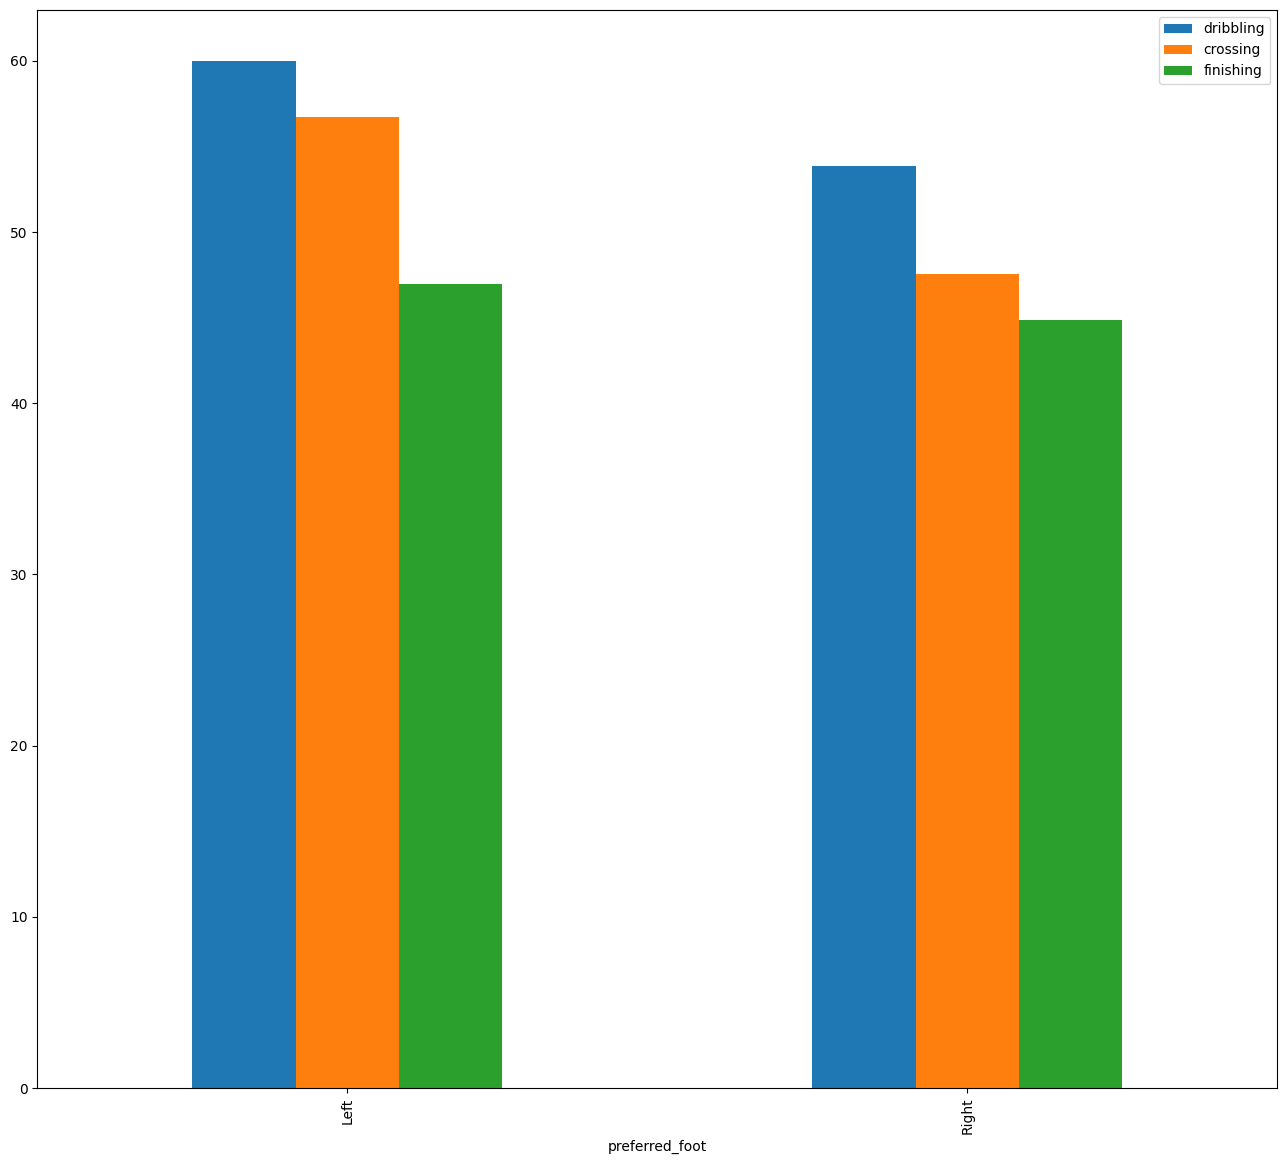

In [9]:
performance_by_foot=data.groupby('preferred_foot')[['dribbling','crossing','finishing']].mean()

performance_by_foot.plot(kind='bar')

5. How does players' overall rating correlate with their market value and wage?

<Axes: xlabel='overall_rating', ylabel='wage_euro'>

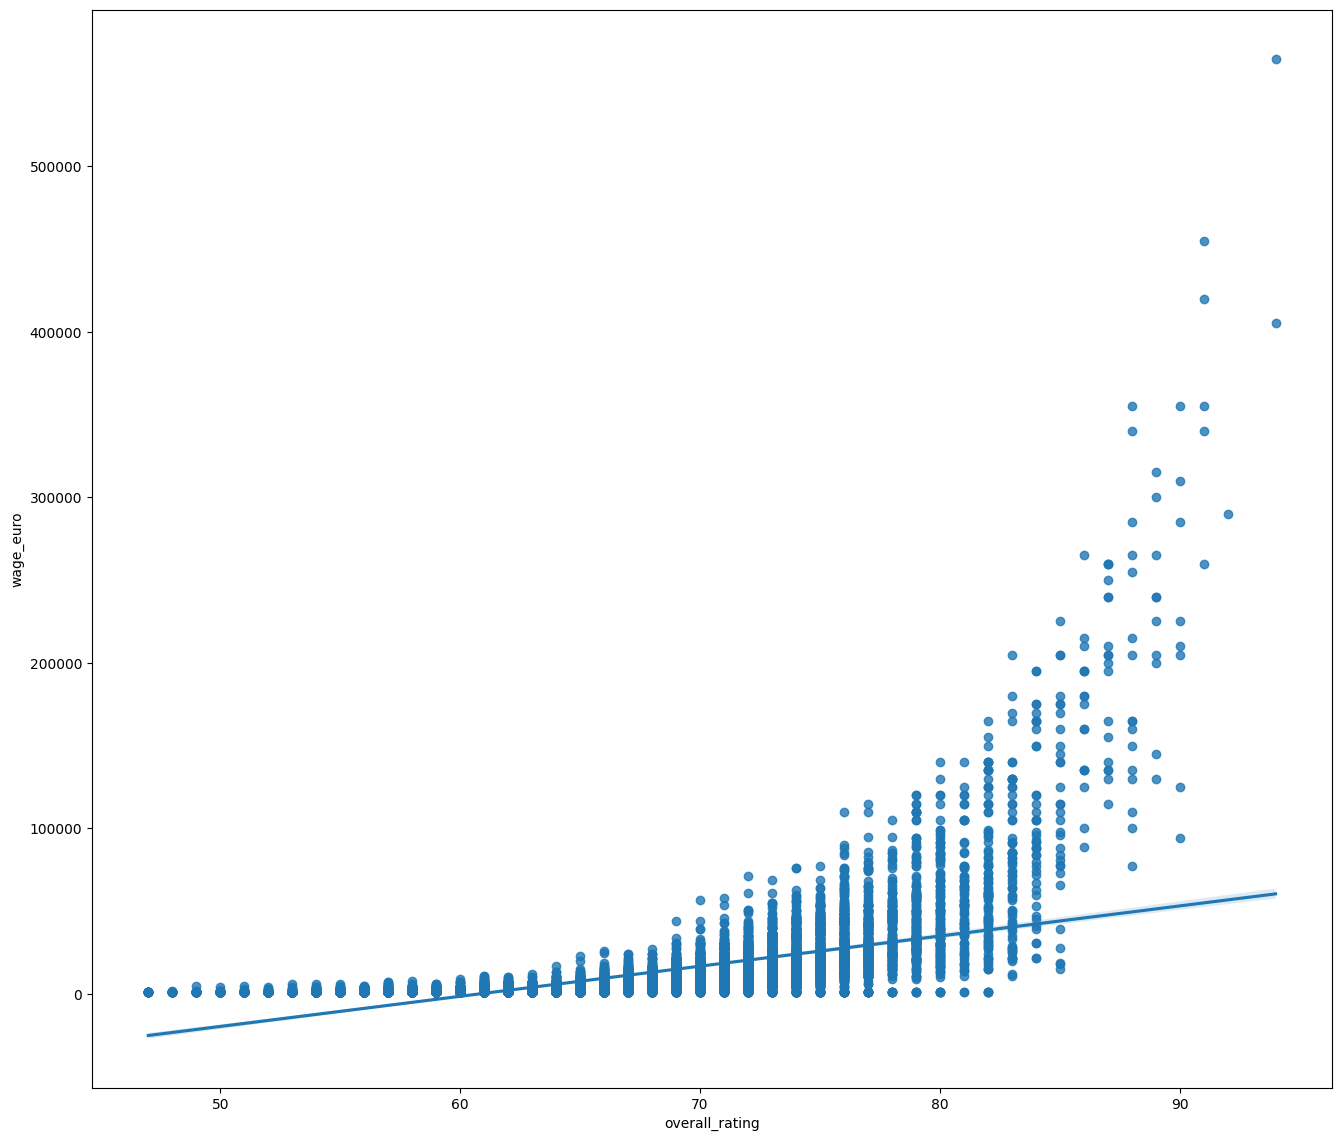

In [21]:
## Overall rating Vs Salary

non_zero = data[(data['wage_euro'].notna()) & (data['wage_euro'] > 0) & (data['overall_rating'] > 0)]

sns.regplot(non_zero,y='wage_euro',x='overall_rating')

<Axes: xlabel='overall_rating', ylabel='value_euro'>

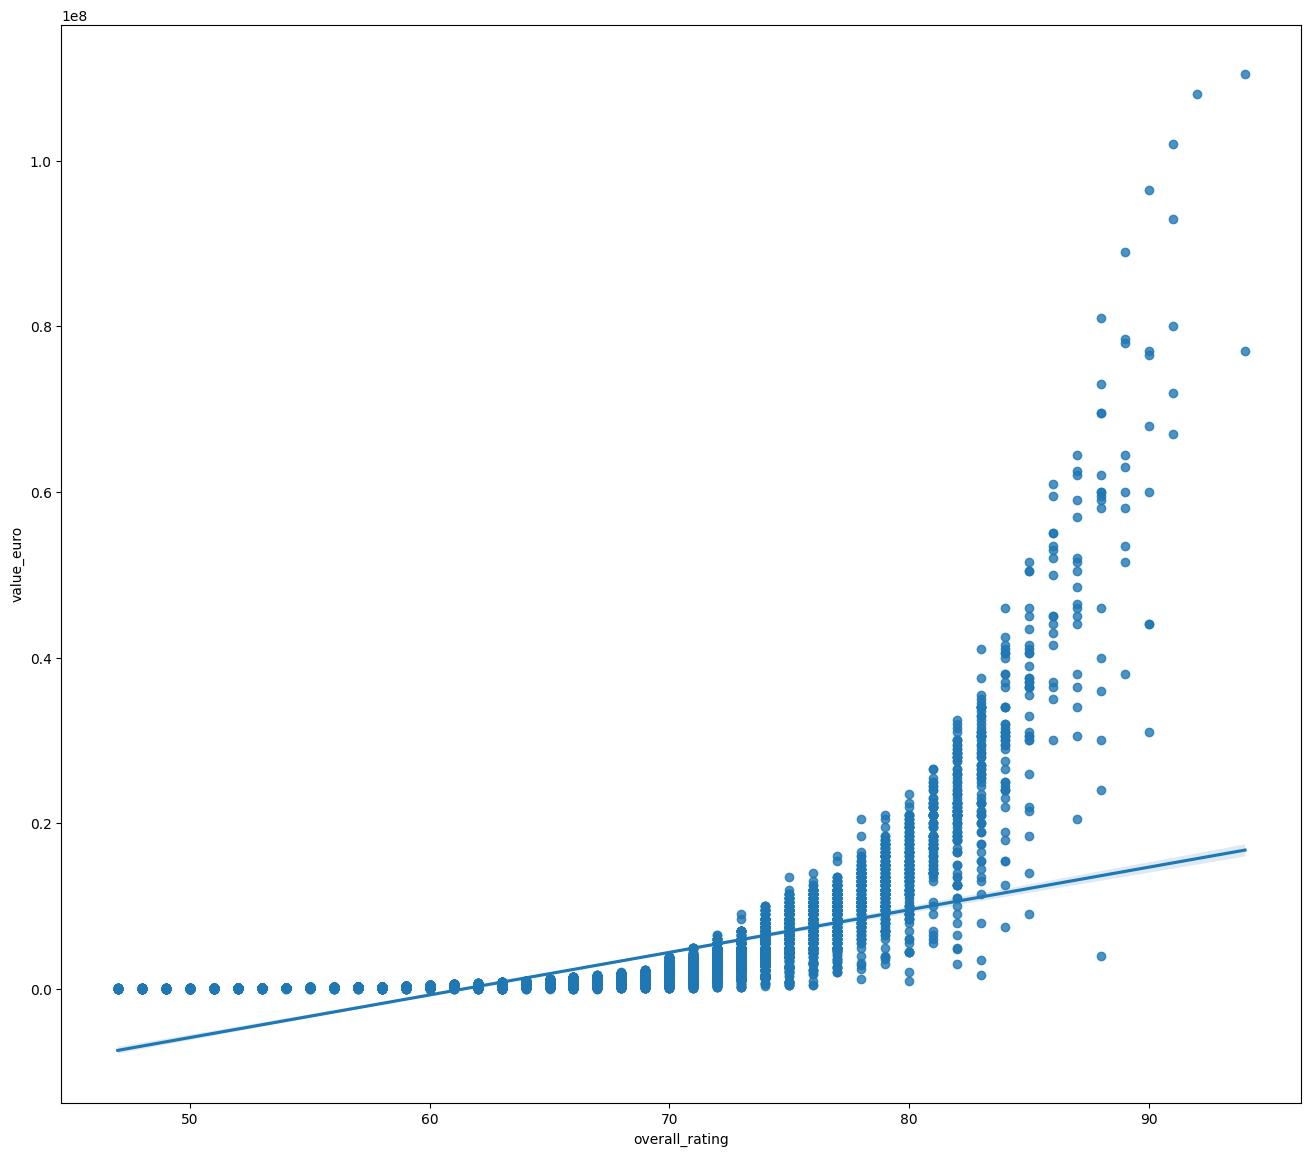

In [20]:
## Overall rating Vs market value

sns.regplot(data=non_zero,y='value_euro',x='overall_rating')

6. What is the distribution of players' physical attributes (height, weight, strength) across different age groups?

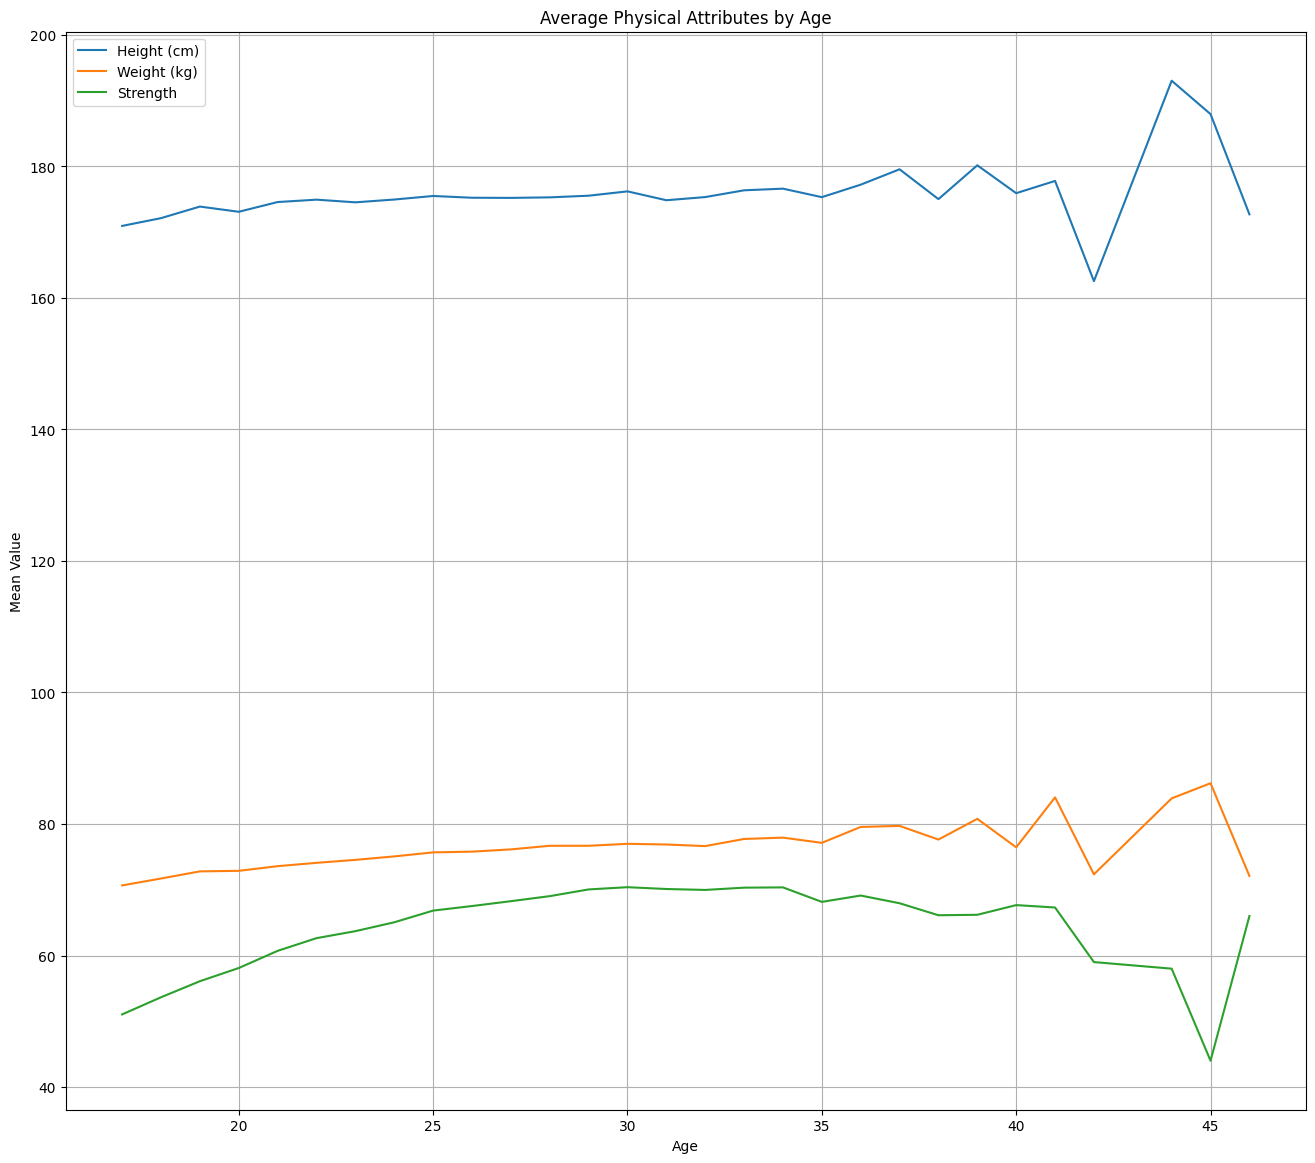

In [45]:
mean_values = data.groupby('age')[['height_cm', 'weight_kgs', 'strength']].mean().reset_index()

plt.plot(mean_values['age'], mean_values['height_cm'], label='Height (cm)')
plt.plot(mean_values['age'], mean_values['weight_kgs'], label='Weight (kg)')
plt.plot(mean_values['age'], mean_values['strength'], label='Strength')
plt.title("Average Physical Attributes by Age")
plt.xlabel("Age")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.show()


7. How does the international reputation of players relate to their age and overall rating?

/tmp/ipykernel_11069/812952845.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='international_reputation(1-5)', y='overall_rating', palette='muted')


<Axes: xlabel='international_reputation(1-5)', ylabel='overall_rating'>

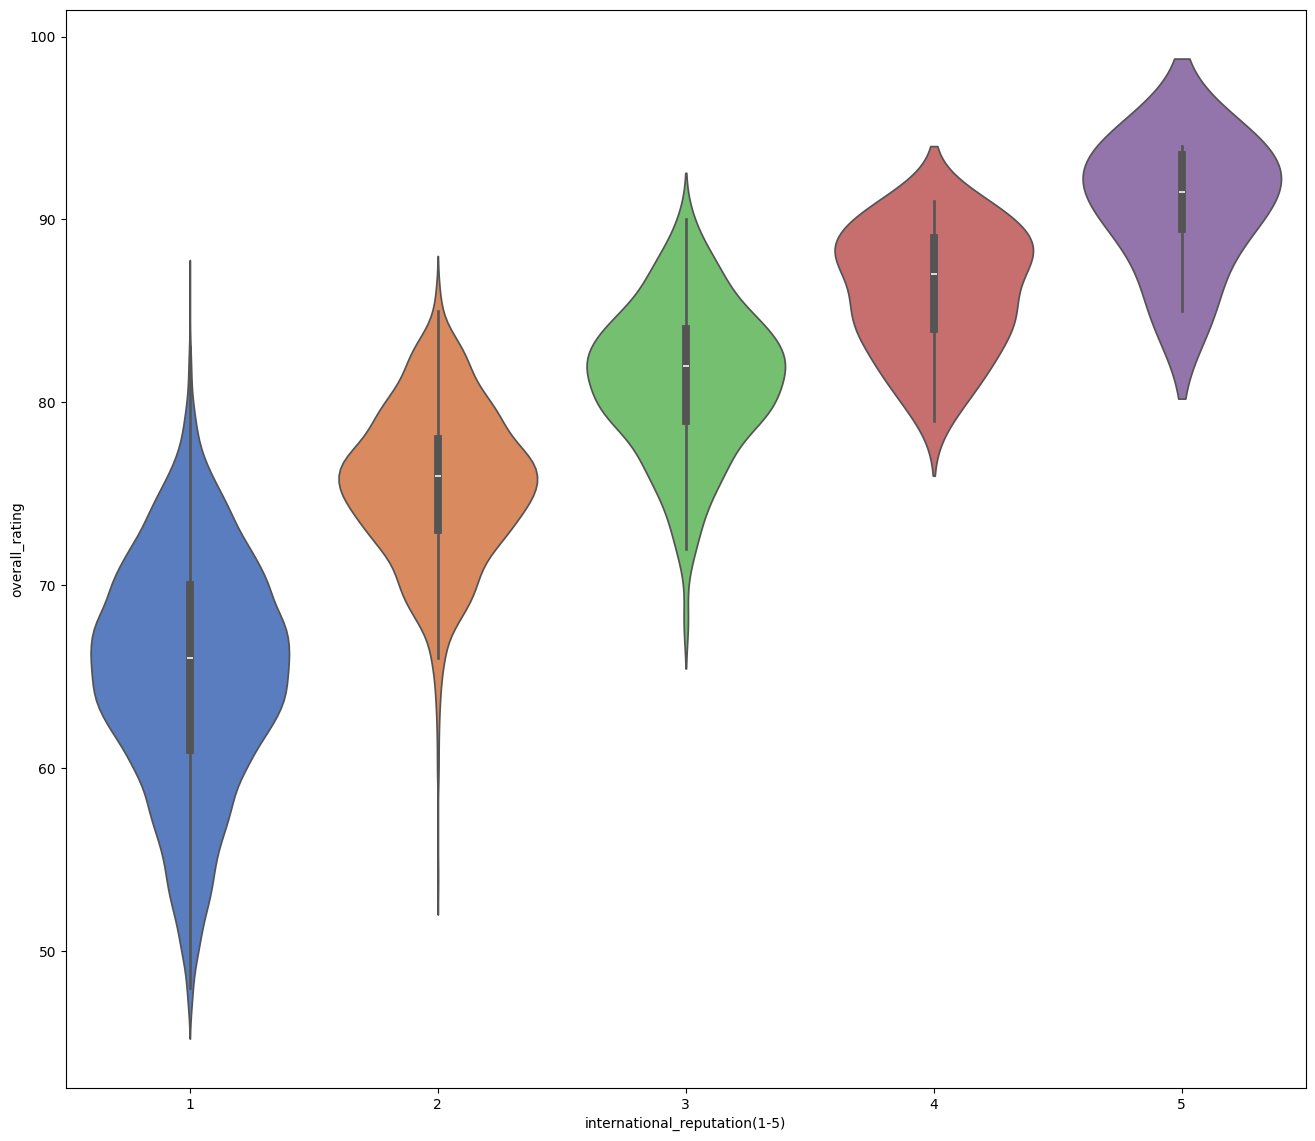

In [57]:
sns.violinplot(data=data, x='international_reputation(1-5)', y='overall_rating', palette='muted')

/tmp/ipykernel_11069/2390560024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='international_reputation(1-5)', y='age', palette='muted')


<Axes: xlabel='international_reputation(1-5)', ylabel='age'>

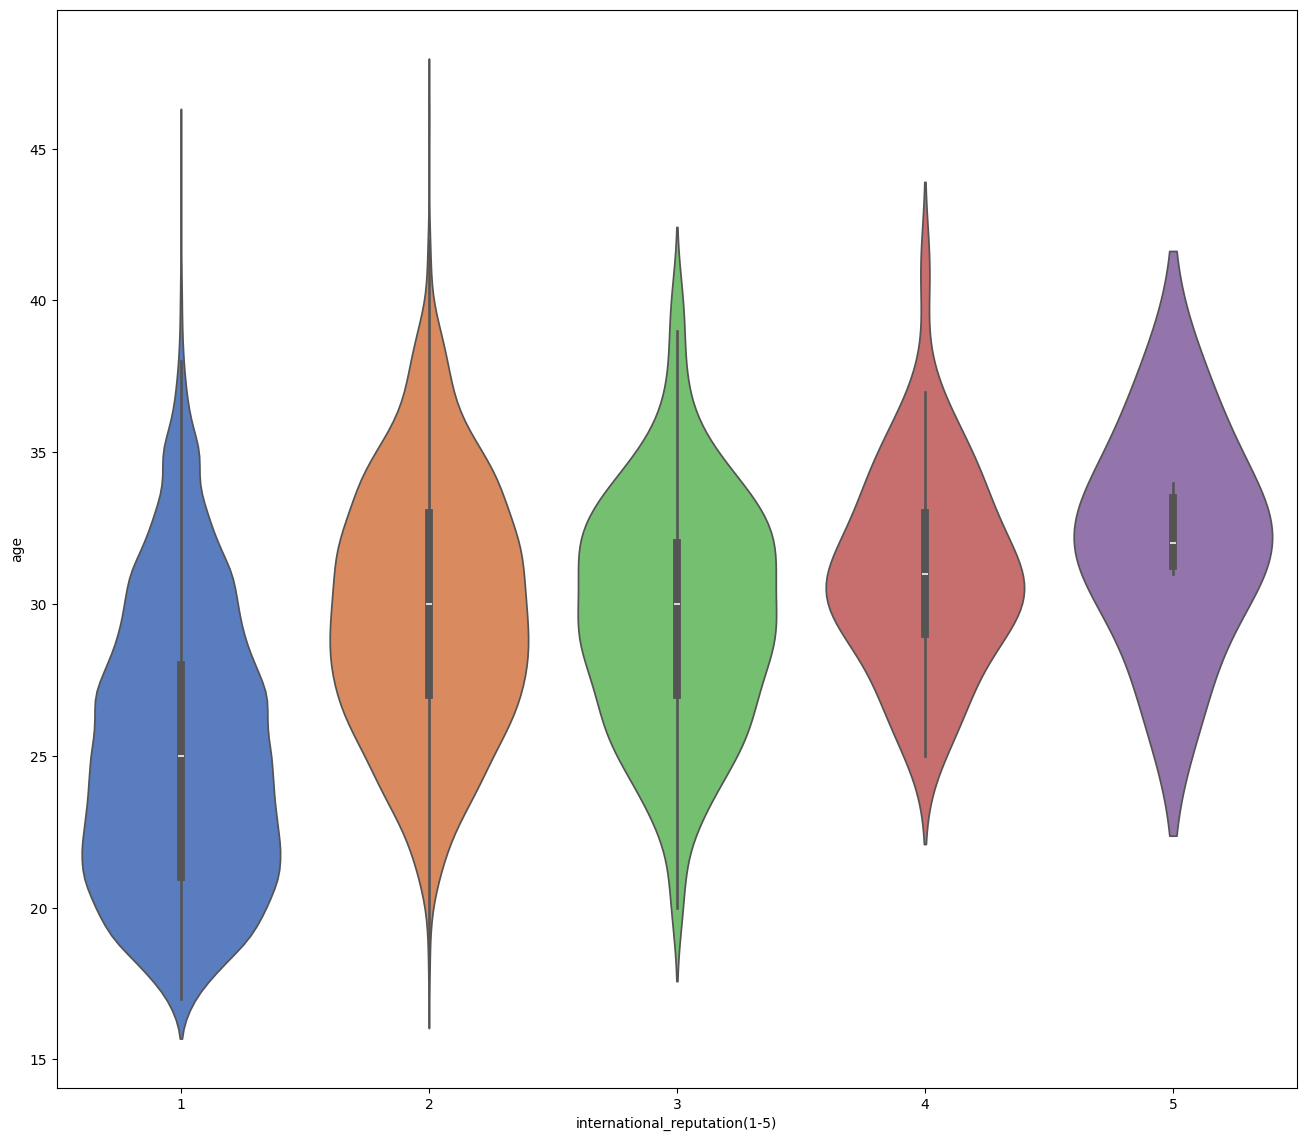

In [62]:
sns.violinplot(data=data, x='international_reputation(1-5)', y='age', palette='muted')

8. What is the correlation between key attacking attributes (e.g., finishing, shot power, long shots) and overall rating?

In [63]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'age_group'],
      dtype='object')

<Axes: >

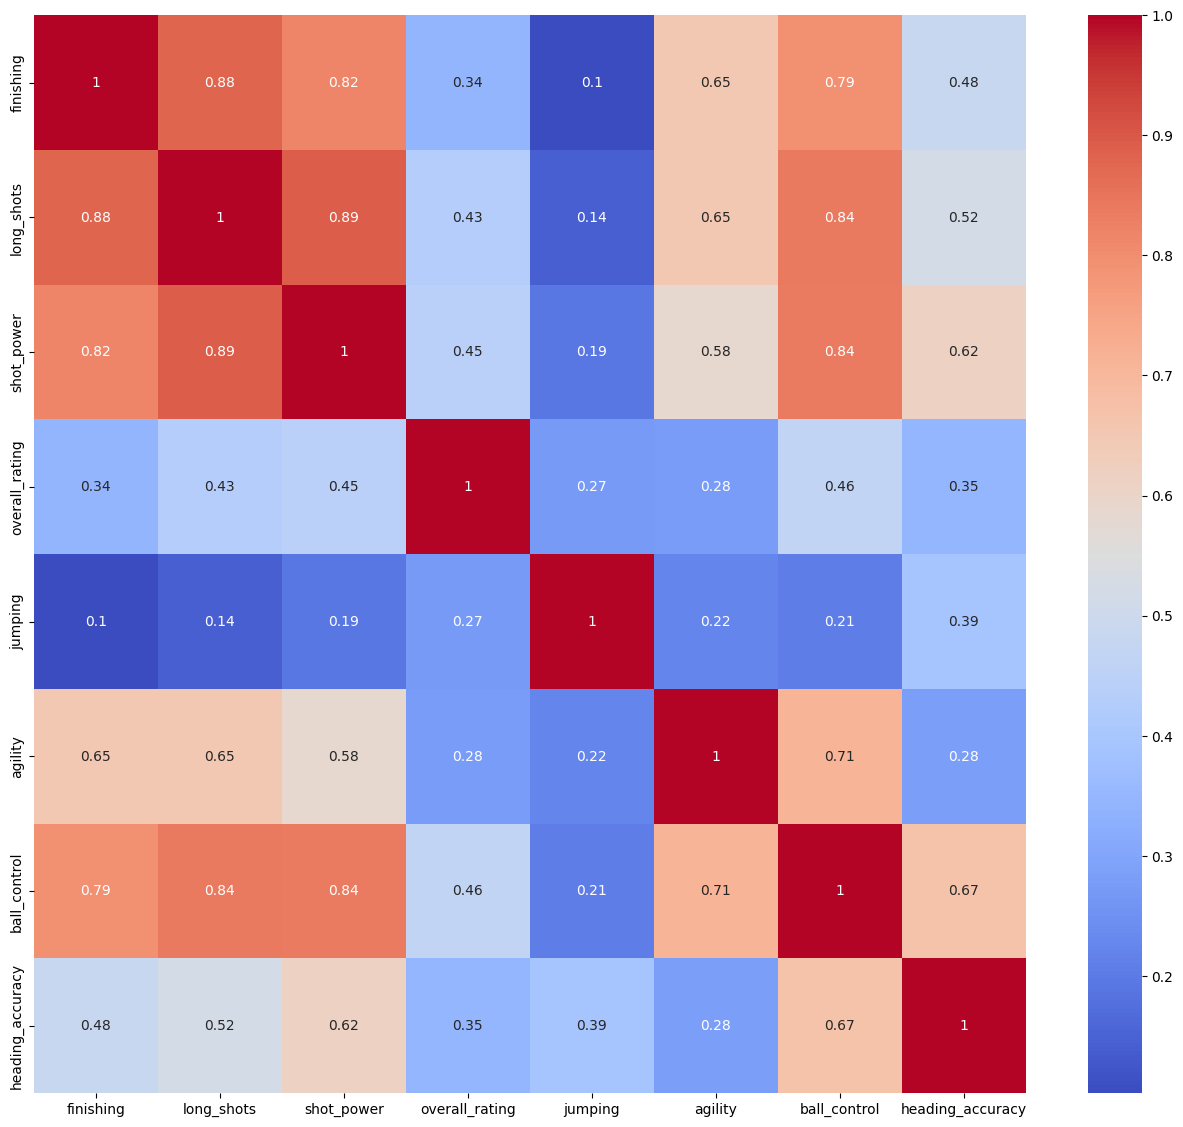

In [ ]:
attack_attr=data[['finishing','long_shots','shot_power','overall_rating','jumping','agility','ball_control','heading_accuracy']].dropna()

sns.heatmap(attack_attr.corr(), annot=True, cmap='coolwarm')


9. How does the distribution of player's skill moves and weak foot rating relate to their overall rating and potential?

/tmp/ipykernel_11069/267333535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='skill_moves(1-5)', y='overall_rating', palette='Spectral')


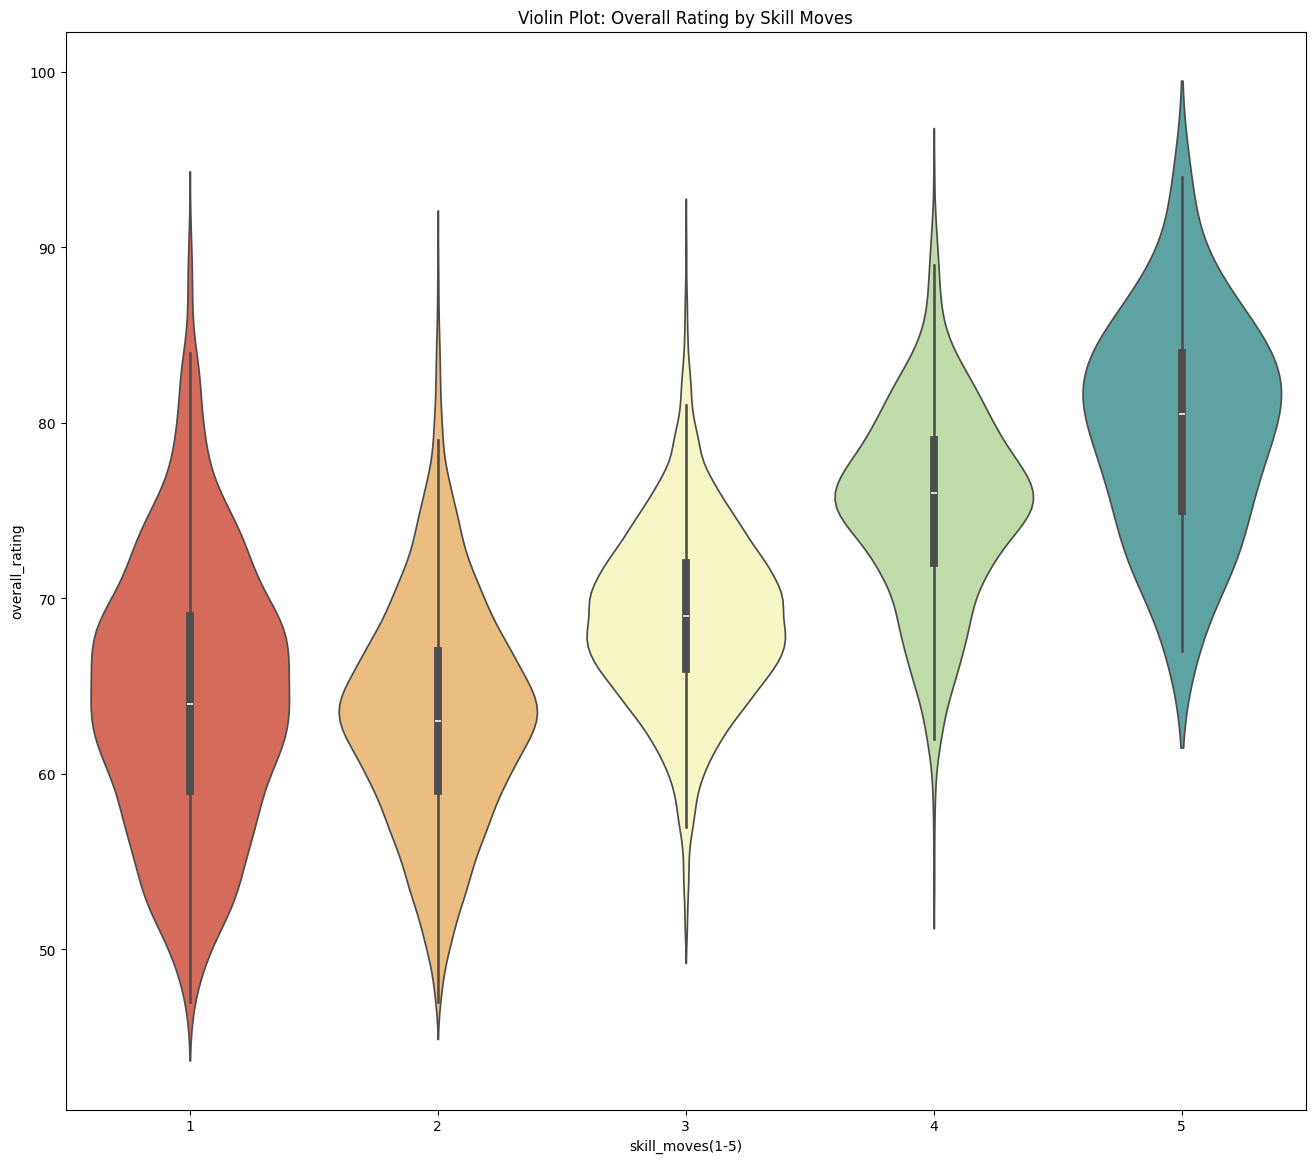

In [80]:
sns.violinplot(data=data, x='skill_moves(1-5)', y='overall_rating', palette='Spectral')
plt.title("Violin Plot: Overall Rating by Skill Moves")
plt.show()


/tmp/ipykernel_11069/81977562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='weak_foot(1-5)', y='overall_rating', palette='Spectral')


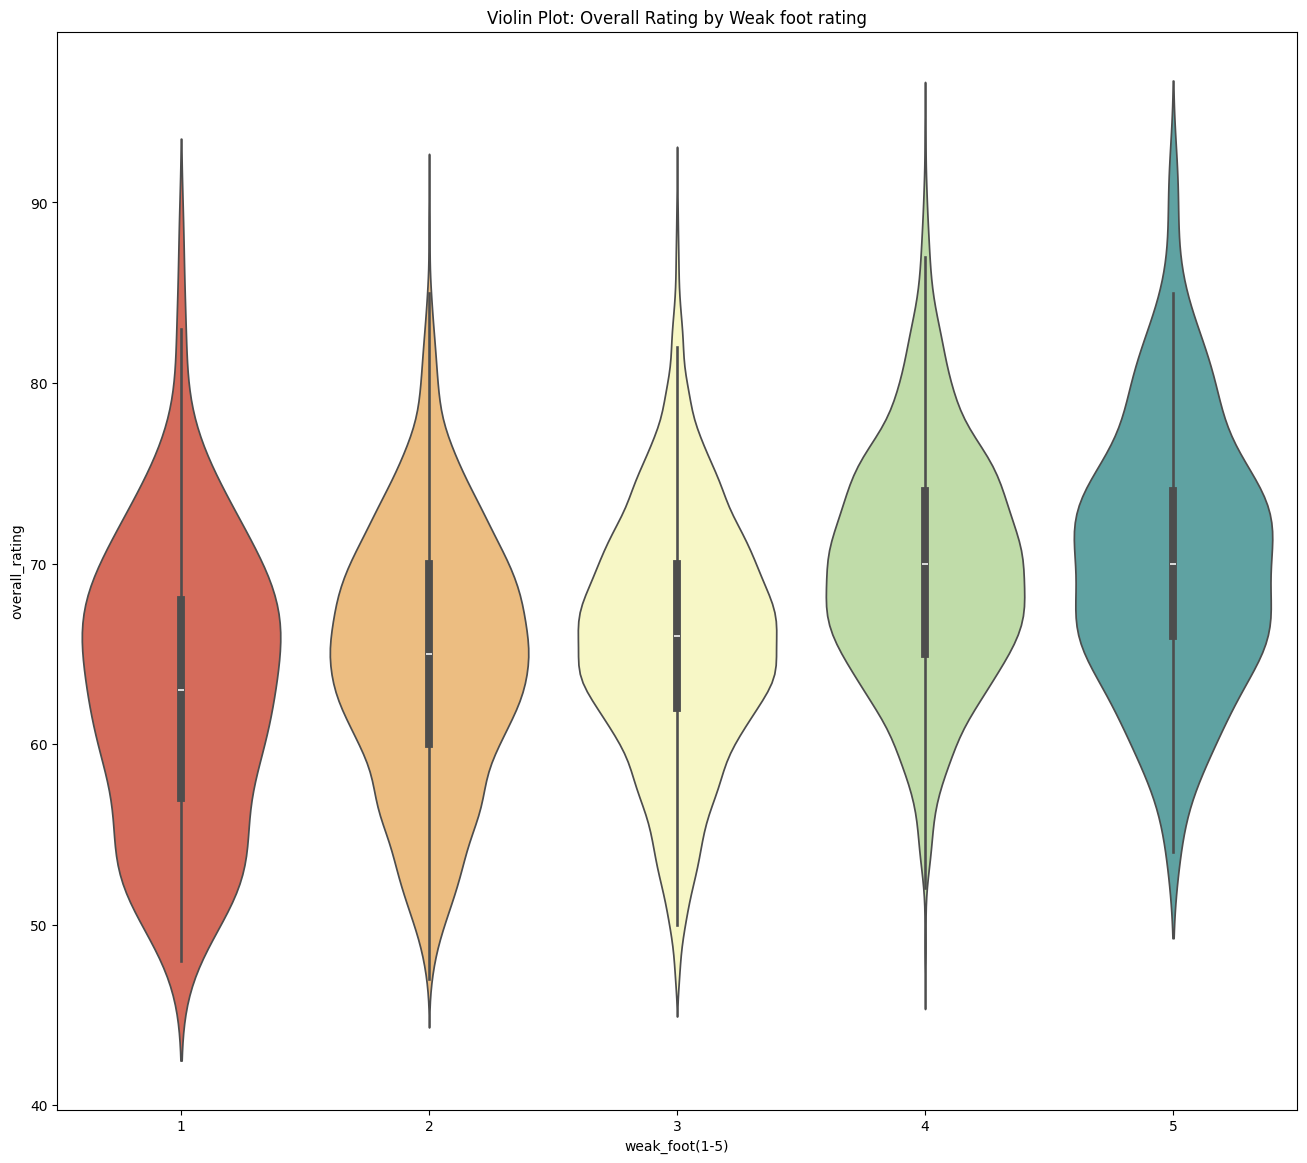

In [82]:
sns.violinplot(data=data, x='weak_foot(1-5)', y='overall_rating', palette='Spectral')
plt.title("Violin Plot: Overall Rating by Weak foot rating")
plt.show()


10. How do players' physical attributes (height, weight, stamina, strength) influence key defensive attributes (e.g., interceptions, tackling, standing tackle)?

In [83]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'age_group'],
      dtype='object')

<Axes: >

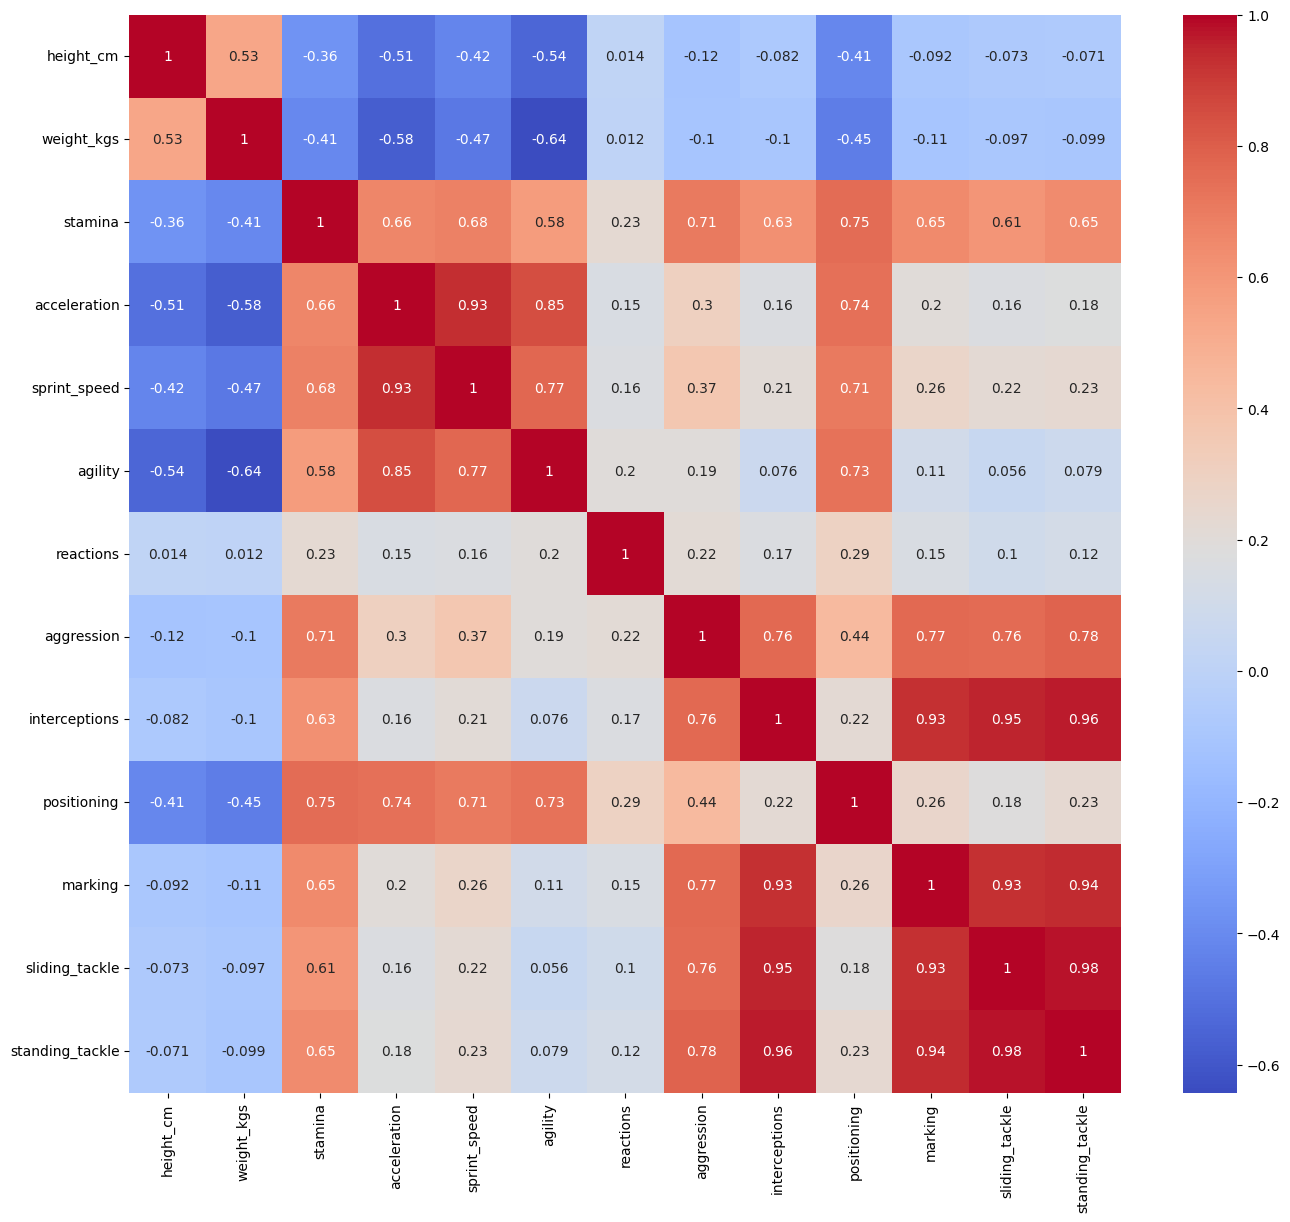

In [98]:
attr_corr=data[['height_cm', 'weight_kgs', 'stamina', 'acceleration', 'sprint_speed', 'agility', 'reactions','aggression', 'interceptions', 'positioning', 'marking', 'sliding_tackle', 'standing_tackle']].corr()
sns.heatmap(attr_corr,cmap="coolwarm",annot=True)

<Axes: xlabel='phy_attr', ylabel='def_attr'>

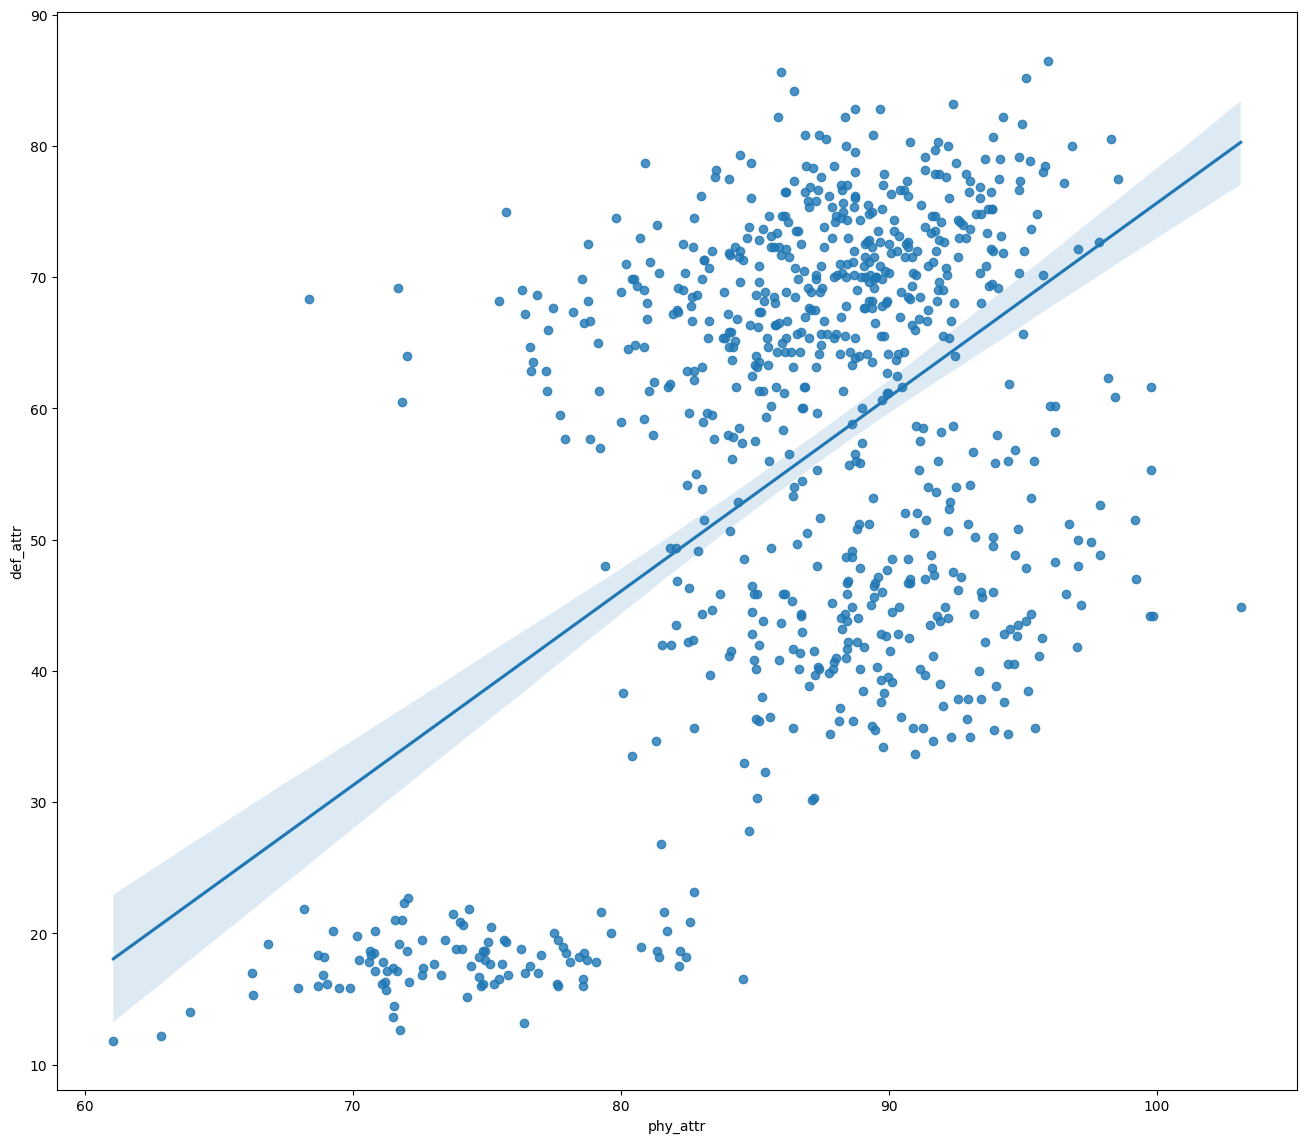

In [99]:
data.dropna(inplace=True)
data['phy_attr'] = data[['height_cm', 'weight_kgs', 'stamina', 'acceleration', 'sprint_speed', 'agility', 'reactions']].mean(axis=1)
data['def_attr'] = data[['aggression', 'interceptions', 'positioning', 'marking', 'sliding_tackle', 'standing_tackle']].mean(axis=1)


sns.regplot(data=data, x='phy_attr', y='def_attr')
